### RS-Movies_dataset

### Importing The Liabraries

In [169]:
import pandas as pd
import numpy as np

import os
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity

from numpy import savez_compressed
from numpy import load

### 1.Loading the Dataset.

#### https://www.kaggle.com/rounakbanik/the-movies-dataset

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

## Acknowledment

### How Recommender System Works
#### 1. https://github.com/Saurav-Raghaw/DataScience/blob/main/Recommendation.ipynb

### Fundamental of Matrix Factorization For Recommender System

#### 2. https://www.linkedin.com/pulse/fundamental-matrix-factorization-recommender-system-saurav-kumar/

### How Netflix RS works?

#### 3. https://www.linkedin.com/posts/saurav-kumar-78b97920a_recommender-system-netflix-activity-6814943939448102912-3Mjh


In [170]:
df = pd.read_csv("movie_data2.csv")

In [171]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### Checking for NaN values

In [172]:



print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  9


In [173]:
#Checking the NaN values in entire dataset.
df.isnull().sum().sum()

4454

In [174]:
#Removing Duplicates
dup_bool = df.duplicated(['index' ,'budget' ,'genres', 'homepage', 'id' ,'keywords', 'original_language',
 'original_title', 'overview', 'popularity', 'production_companies',
 'production_countries', 'release_date', 'revenue', 'runtime',
 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
 'cast', 'crew', 'director'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 0


In [175]:
print(df.shape)
print(df.dtypes)

(4803, 24)
index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object


In [176]:
print(df.columns.values)

['index' 'budget' 'genres' 'homepage' 'id' 'keywords' 'original_language'
 'original_title' 'overview' 'popularity' 'production_companies'
 'production_countries' 'release_date' 'revenue' 'runtime'
 'spoken_languages' 'status' 'tagline' 'title' 'vote_average' 'vote_count'
 'cast' 'crew' 'director']


In [177]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### 2. Choosing the Relevant Features

In [178]:
features = ['genres', 'keywords', 'title', 'cast', 'director','tagline']

In [179]:
#Checking for the NaN values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

Some columns have NaN data points that will create a problem, Replacing it with empty string ('').

In [180]:
df['cast'].isnull().values.any()

True

In [181]:
#Filling the NaN values with string.
#Calling this function over each row of our dataframe.
for feature in features:
    df[feature] = df[feature].fillna('')

In [182]:
#Function for combining the values of these columns into a single string.
def combine_features(row):
    return row['title']+' '+row['genres']+' '+row['director']+' '+row['keywords']+' '+row['cast']+' '+row['tagline']

In [183]:
#applying combine_feature method over each row of Dataframe and storing the combined string in "combined_features" column.
df['combined_features'] = df.apply(combine_features, axis = 1)

In [184]:
df['combined_features']

0       Avatar Action Adventure Fantasy Science Fictio...
1       Pirates of the Caribbean: At World's End Adven...
2       Spectre Action Adventure Crime Sam Mendes spy ...
3       The Dark Knight Rises Action Crime Drama Thril...
4       John Carter Action Adventure Science Fiction A...
                              ...                        
4798    El Mariachi Action Crime Thriller Robert Rodri...
4799    Newlyweds Comedy Romance Edward Burns  Edward ...
4800    Signed, Sealed, Delivered Comedy Drama Romance...
4801    Shanghai Calling  Daniel Hsia  Daniel Henney E...
4802    My Date with Drew Documentary Brian Herzlinger...
Name: combined_features, Length: 4803, dtype: object

In [185]:
#Want to see
print(df.loc[2, 'combined_features'])


Spectre Action Adventure Crime Sam Mendes spy based on novel secret agent sequel mi6 Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci A Plan No One Escapes


### Feed these strings to a CountVectorizer() object for getting the count matrix.

### How CountVectorizer() works.

#### https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e
#### https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [186]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])

In [187]:
count_matrix

<4803x19184 sparse matrix of type '<class 'numpy.int64'>'
	with 134944 stored elements in Compressed Sparse Row format>

###  Cosine Similarity.

### How Cosine Similarity Works?

#### https://towardsdatascience.com/understanding-cosine-similarity-and-its-application-fd42f585296a

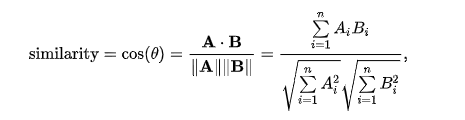

#### .NPZ Format : https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/

In [188]:
start = datetime.now()

if os.path.isfile('cosine_sim2.npz'):
    print("It is already present in my local repository. Loading...\n\n")
    dict_data = load("cosine_sim2.npz")
    cosine_sim = dict_data['arr_0']
    print("DONE..")
else:
    print("File is not present in my Local Repository..Creating....\n\n")
    cosine_sim = cosine_similarity(count_matrix)
    print('Saving it into my Local Repository....\n\n')
    savez_compressed("cosine_sim2.npz", cosine_sim)
    print("DONE..\n")
    
print(datetime.now() - start)

It is already present in my local repository. Loading...


DONE..
0:00:04.760109


In [189]:
cosine_sim

array([[1.        , 0.26669823, 0.09869275, ..., 0.        , 0.        ,
        0.        ],
       [0.26669823, 1.        , 0.08908708, ..., 0.06681531, 0.        ,
        0.        ],
       [0.09869275, 0.08908708, 1.        , ..., 0.        , 0.0805823 ,
        0.        ],
       ...,
       [0.        , 0.06681531, 0.        , ..., 1.        , 0.        ,
        0.07142857],
       [0.        , 0.        , 0.0805823 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07142857, 0.        ,
        1.        ]])

In [190]:
#Functions to get movie title from movie index.
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]

In [191]:
#Functions to get movie index from movie title.
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [192]:
#Functions to get movie homepage from movie index.
def get_homepage_from_index(index):
    return df[df.index == index]["homepage"].values[0]

In [201]:
#Taking the Movie name as input
movie_name = input("Enter the movie name: ")

Enter the movie name: Mission: Impossible - Ghost Protocol


In [202]:
#getting the movie index
movie_index = get_index_from_title(movie_name)

In [203]:
movie_index

153

In [204]:
#Getting the movie homepge
movie_homepage = get_homepage_from_index(movie_index)
movie_homepage

'http://www.missionimpossible.com/'

Now we'll access the row corresponding to this movie in the similarity matrix. 
and will get the similarity scores of all other movies from the current movie. 
Then we will enumerate through all the similarity scores of that movie to make a tuple of movie index and similarity score. 
This will convert a row of similarity scores like this- [1 0.5 0.2 0.9] to this- [(0, 1) (1, 0.5) (2, 0.2) (3, 0.9)] . 
Here, each item is in this form- (movie index, similarity score)

In [205]:
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [206]:
#We will sort the list similar_movies according to similarity scores in descending order. 
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

### Printing the Top Recommended Movie

In [207]:
i=0
print("Top 10 similar movies to "+movie_name+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]), '---->  Link: ', get_homepage_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Mission: Impossible - Ghost Protocol are:

Mission: Impossible - Rogue Nation ---->  Link:  http://www.missionimpossible.com
Containment ---->  Link:  http://www.containment-film.com/
Daylight ---->  Link:  nan
GoldenEye ---->  Link:  http://www.mgm.com/view/movie/757/Goldeneye/
Phone Booth ---->  Link:  nan
No Escape ---->  Link:  nan
Gangster Squad ---->  Link:  http://gangstersquad.warnerbros.com/
The Net ---->  Link:  nan
The Incredibles ---->  Link:  http://disney.go.com/disneyvideos/animatedfilms/incredibles/main.html
Baby's Day Out ---->  Link:  nan
Rumble in the Bronx ---->  Link:  nan


### Printing the movie name without Link.

In [208]:
i=0
print("Top 10 similar movies to "+movie_name+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>25:
        break

Top 10 similar movies to Mission: Impossible - Ghost Protocol are:

Mission: Impossible - Rogue Nation
Containment
Daylight
GoldenEye
Phone Booth
No Escape
Gangster Squad
The Net
The Incredibles
Baby's Day Out
Rumble in the Bronx
Mission: Impossible
Mission: Impossible III
Mission: Impossible II
Unaccompanied Minors
When the Cat's Away
Pompeii
Johnny English Reborn
Final Destination
Spectre
The Expendables 3
Scary Movie 2
John Q
The French Connection
Beer League
Doubt


In [168]:
print('It Works....')

It Works....
